In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
picher=pd.read_csv("G:/picher.csv")

In [214]:
from matplotlib import font_manager,rc

In [231]:
import matplotlib as mpl
# 현재 OS 내에 설치된 폰트를 확인합니다.
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
mpl.rc('font', family='Batang')

In [208]:
picher

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


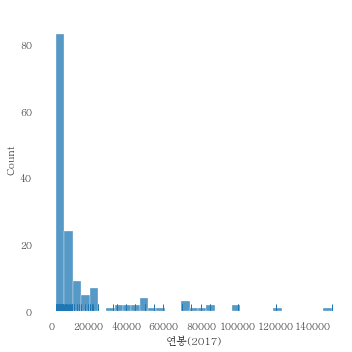

In [209]:
#연봉 분포 시각화 
sns.displot(picher["연봉(2017)"],kde=False,rug=True)

<AxesSubplot:xlabel='승', ylabel='연봉(2017)'>

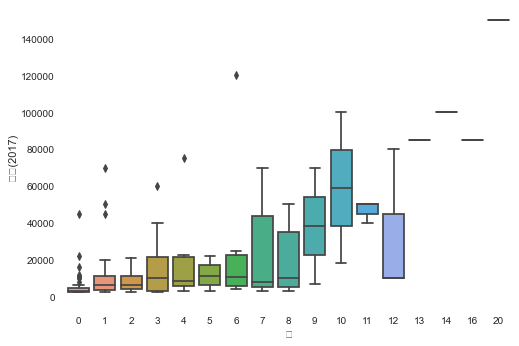

In [176]:
sns.boxplot(x=picher["승"],y=picher["연봉(2017)"])

<AxesSubplot:xlabel='연봉(2017)'>

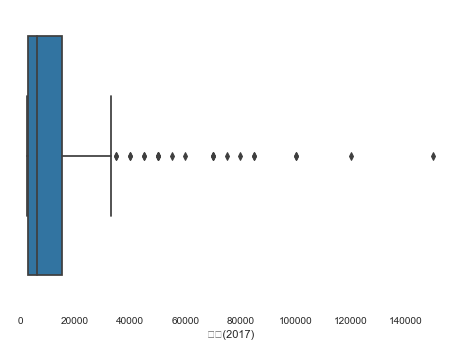

In [177]:
sns.boxplot(picher["연봉(2017)"])

In [232]:
#단위가 전부 다 다르므로 정규화  (각 컬럼의 최대값으로 칼럼 데이터를 나누는것 )
df=picher.copy()
del df["선수명"]
del df["팀명"]
del df["연봉(2018)"]
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   승         152 non-null    int64  
 1   패         152 non-null    int64  
 2   세         152 non-null    int64  
 3   홀드        152 non-null    int64  
 4   블론        152 non-null    int64  
 5   경기        152 non-null    int64  
 6   선발        152 non-null    int64  
 7   이닝        152 non-null    float64
 8   삼진/9      152 non-null    float64
 9   볼넷/9      152 non-null    float64
 10  홈런/9      152 non-null    float64
 11  BABIP     152 non-null    float64
 12  LOB%      152 non-null    float64
 13  ERA       152 non-null    float64
 14  RA9-WAR   152 non-null    float64
 15  FIP       152 non-null    float64
 16  kFIP      152 non-null    float64
 17  WAR       152 non-null    float64
 18  연봉(2017)  152 non-null    int64  
dtypes: float64(11), int64(8)
memory usage: 22.7 KB


In [233]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
print(standardScaler.fit(df))
df1= standardScaler.transform(df)
df1
df2=pd.DataFrame(df1,columns=df.columns, index=list(df.index.values))
df2

StandardScaler()


,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,-0.972099,-0.375064,0.365057,0.163412,-1.006027,0.412709,-1.233602,0.377052,0.477566,-0.861951,-0.336696
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,-0.780490,0.605813,-0.147905,-0.873882,-0.270312,-0.030353,-0.362917,0.484298,0.624396,-0.877127,-0.536985
149,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,-0.759200,0.308578,1.223282,0.467836,-1.360901,1.351808,-1.026814,1.352985,1.393990,-0.968185,-0.020240
150,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,0.205943,1.200284,0.226952,0.005563,0.465402,-0.066472,-0.792818,0.730962,0.715532,-1.036478,-0.544996


In [234]:
picher=picher.rename(columns={"연봉(2018)":"y"})
df2

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,-0.972099,-0.375064,0.365057,0.163412,-1.006027,0.412709,-1.233602,0.377052,0.477566,-0.861951,-0.336696
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,-0.780490,0.605813,-0.147905,-0.873882,-0.270312,-0.030353,-0.362917,0.484298,0.624396,-0.877127,-0.536985
149,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,-0.759200,0.308578,1.223282,0.467836,-1.360901,1.351808,-1.026814,1.352985,1.393990,-0.968185,-0.020240
150,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,0.205943,1.200284,0.226952,0.005563,0.465402,-0.066472,-0.792818,0.730962,0.715532,-1.036478,-0.544996


In [235]:
#팀명 이름 더미변수화
team_encoding = pd.get_dummies(picher['팀명'])
team_encoding


,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
147,0,0,0,0,0,0,0,0,1
148,1,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,1,0,0
150,0,0,0,0,0,0,0,1,0


In [236]:
#데이터 결합
df2=df2.join(team_encoding)
df2

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,...,2.743746,0,0,0,0,1,0,0,0,0
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,...,1.341724,0,0,1,0,0,0,0,0,0
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,...,5.347500,1,0,0,0,0,0,0,0,0
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,...,3.344612,0,0,1,0,0,0,0,0,0
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,...,2.743746,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,-0.972099,-0.375064,...,-0.336696,0,0,0,0,0,0,0,0,1
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,-0.780490,0.605813,...,-0.536985,1,0,0,0,0,0,0,0,0
149,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,-0.759200,0.308578,...,-0.020240,0,0,0,0,0,0,1,0,0
150,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,0.205943,1.200284,...,-0.544996,0,0,0,0,0,0,0,1,0


In [237]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   승         152 non-null    float64
 1   패         152 non-null    float64
 2   세         152 non-null    float64
 3   홀드        152 non-null    float64
 4   블론        152 non-null    float64
 5   경기        152 non-null    float64
 6   선발        152 non-null    float64
 7   이닝        152 non-null    float64
 8   삼진/9      152 non-null    float64
 9   볼넷/9      152 non-null    float64
 10  홈런/9      152 non-null    float64
 11  BABIP     152 non-null    float64
 12  LOB%      152 non-null    float64
 13  ERA       152 non-null    float64
 14  RA9-WAR   152 non-null    float64
 15  FIP       152 non-null    float64
 16  kFIP      152 non-null    float64
 17  WAR       152 non-null    float64
 18  연봉(2017)  152 non-null    float64
 19  KIA       152 non-null    uint8  
 20  KT        152 non-null    uint8 

In [238]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [239]:
#학습용 데이터와 검증용 데이터 분할 
X=df2
y=picher['y']

#검증은 20%로 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [240]:
y_train

94      4000
118     4200
109     3500
5      85000
75      4200
       ...  
52     10000
19     70000
98      3400
110    18500
93      2700
Name: y, Length: 121, dtype: int64

In [241]:
y

0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: y, Length: 152, dtype: int64

In [242]:
#회귀분석

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[   235.24762032   1297.33103703   -249.87170696   -931.99184478
   1266.85703204  -2426.36839983  -4781.49611719    851.21211383
   5379.19030317   7587.07530902  18084.81631763  -1476.1375322
  -1371.00603916   -415.31442203   3946.06166906 -93826.06683011
  77416.61465357  10238.64062632  19067.55679603  -1560.86205158
   1572.00472193   -747.04952389   -523.54687556    898.37638984
   -892.11801281    449.91117164  -2810.55645139   3613.84063182]
18640.47296454393


In [135]:
X

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
0,0.016838,-0.588996,-0.974240,0,0,0,0.448091,0,3.185125,1,...,0.674321,2.460174,-0.307465,3.324578,2.743746,2.653920,1.231202,0,-0.587641,-0.443844
1,-0.242485,-0.521574,-1.065398,0,0,1,-0.123170,0,3.125265,0,...,0.134976,2.357272,-0.098828,2.026181,1.341724,2.556178,2.513001,0,-0.587641,-0.670731
2,-0.095911,-0.627523,-0.840183,1,0,0,0.309604,0,2.983779,0,...,0.110138,2.563077,-0.307465,4.363295,5.347500,2.715757,0.910752,0,-0.587641,-0.414250
3,-0.479259,-0.629931,-0.700764,0,0,1,0.560612,0,2.749783,0,...,0.351424,2.254370,-0.307465,1.766502,3.344612,2.358699,1.231202,0,-0.587641,-0.187363
4,-0.197386,-0.540837,-0.614968,0,0,0,0.482713,0,2.760666,0,...,0.156266,2.460174,-0.307465,2.545540,2.743746,2.596072,1.231202,0,-0.587641,-0.295875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.163412,0.412709,0.377052,0,0,0,-1.006027,0,-1.233602,0,...,-0.972099,-0.112380,-0.307465,-0.310932,-0.336696,0.104645,0.590302,1,-0.587641,0.365057
148,-0.873882,-0.030353,0.484298,1,0,0,-0.270312,0,-0.362917,0,...,-0.780490,0.505033,-0.307465,-0.051252,-0.536985,0.042808,-0.371047,0,-0.587641,-0.147905
149,0.467836,1.351808,1.352985,0,0,0,-1.360901,0,-1.026814,0,...,-0.759200,-0.421087,-0.307465,-0.830290,-0.020240,-0.852829,-0.371047,0,-0.587641,1.223282
150,0.005563,-0.066472,0.730962,0,0,0,0.465402,0,-0.792818,0,...,0.205943,-0.626891,-0.307465,-0.830290,-0.544996,-0.274355,-0.050597,0,-0.365449,0.226952


In [100]:
y_predicted=model.predict(x_predicted)

NameError: name 'x_predicted' is not defined

In [243]:
x_new=X_test
y_new=model.predict(x_new)
y_new

array([159263.11895962,   7835.91855687,   7269.8846228 ,    249.90443499,
        21972.72116742, 112188.31103849,  35624.89323266,   5088.53330034,
         4752.30958104,  23305.17972002,   9745.07069727,  56364.44827499,
         4065.93677984,  23639.74088342,   3215.2283525 ,   3675.41015706,
        11146.15310279,  21690.28630529,   8257.59566465,  18758.53290176,
        10017.60141513,   8387.44163247,  13255.65162176,   -961.4815087 ,
         5220.88523534,   -528.1658272 ,   5457.40729932,   3089.53985125,
        -7089.0828222 ,   7773.66359333,  21074.85535354])

In [244]:
print(type(y_test))
y_compare={'y_test':y_test, 'y_predicted':y_new}
pd.DataFrame(y_compare)

<class 'pandas.core.series.Series'>


,y_test,y_predicted
2,230000,159263.118960
42,19000,7835.918557
100,3100,7269.884623
124,5200,249.904435
27,18800,21972.721167
7,100000,112188.311038
8,16000,35624.893233
136,3000,5088.533300
142,9000,4752.309581
37,23000,23305.179720


In [204]:
y_compare.plot(y_compare=['y_test','y_predicted'], kind="bar")

AttributeError: 'dict' object has no attribute 'plot'

In [245]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9276949405576705
0.8860171644977816


In [201]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7282.718684746372
14310.696436889142


In [246]:
df2['y']=picher['y']
df2

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화,y
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,...,0,0,0,0,1,0,0,0,0,140000
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,...,0,0,1,0,0,0,0,0,0,120000
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,...,1,0,0,0,0,0,0,0,0,230000
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,...,0,0,1,0,0,0,0,0,0,100000
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,...,0,0,0,0,0,0,1,0,0,111000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,-0.972099,-0.375064,...,0,0,0,0,0,0,0,0,1,7100
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,-0.780490,0.605813,...,1,0,0,0,0,0,0,0,0,7500
149,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,-0.759200,0.308578,...,0,0,0,0,0,0,1,0,0,10000
150,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,0.205943,1.200284,...,0,0,0,0,0,0,0,1,0,4000


<AxesSubplot:>

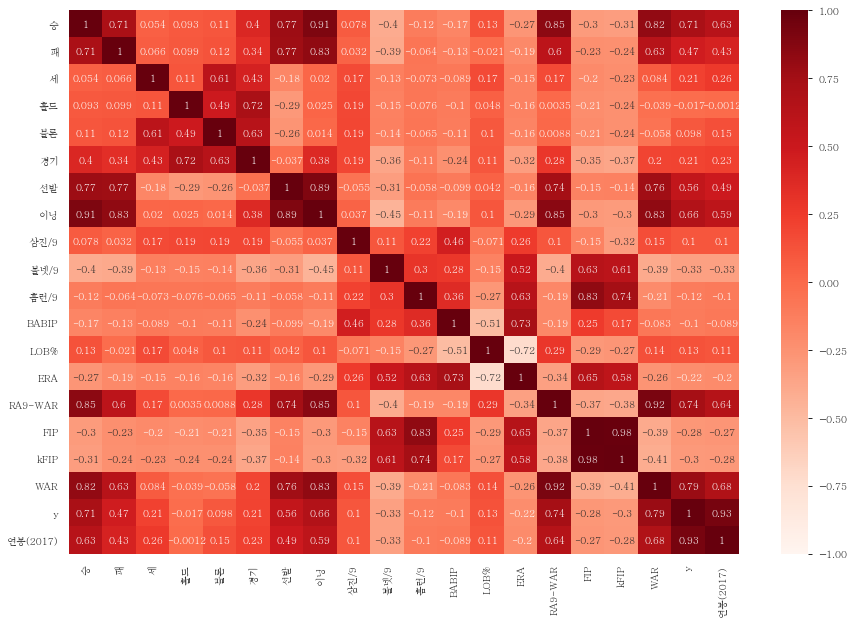

In [247]:
import seaborn as sb
picher_df_corr=df2[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)']]
plt.rcParams['figure.figsize']=(15,10)

sb.heatmap(picher_df_corr.corr(),
          annot=True,
          cmap='Reds',
          vmin = -1, vmax = 1
          )

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(picher_df_corr.values, i) for i in range(picher_df_corr.shape[1])]
vif["features"] = picher_df_corr.columns
vif

,VIF Factor,features
0,7.733989,승
1,5.301088,패
2,3.037209,세
3,3.636067,홀드
4,2.760823,블론
5,14.227864,경기
6,36.258907,선발
7,60.356532,이닝
8,78.720067,삼진/9
9,50.744095,볼넷/9


In [249]:
picher_df_corr=picher_df_corr.drop(['홈런/9','kFIP',], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(picher_df_corr.values, i) for i in range(picher_df_corr.shape[1])]
vif["features"] = picher_df_corr.columns
vif

,VIF Factor,features
0,7.723053,승
1,5.184559,패
2,3.031897,세
3,3.627584,홀드
4,2.751881,블론
5,14.033415,경기
6,36.184654,선발
7,59.397901,이닝
8,1.970108,삼진/9
9,2.242059,볼넷/9


In [250]:
picher_df_corr=picher_df_corr.drop(['선발','이닝'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(picher_df_corr.values, i) for i in range(picher_df_corr.shape[1])]
vif["features"] = picher_df_corr.columns
vif

,VIF Factor,features
0,6.726720,승
1,2.309031,패
2,2.572371,세
3,2.925249,홀드
4,2.666419,블론
5,5.020910,경기
6,1.966439,삼진/9
7,2.217200,볼넷/9
8,3.091305,BABIP
9,3.821809,LOB%


In [251]:
vif.features.values

array(['승', '패', '세', '홀드', '블론', '경기', '삼진/9', '볼넷/9', 'BABIP', 'LOB%',
       'ERA', 'RA9-WAR', 'FIP', 'WAR', 'y', '연봉(2017)'], dtype=object)

In [252]:
picher_df_corr_re=picher_df_corr[['승', '패', '세', '홀드', '블론', '경기', '삼진/9', '볼넷/9', 'BABIP', 'LOB%',
       'ERA', 'RA9-WAR', 'FIP', 'WAR', 'y', '연봉(2017)']]

In [254]:
picher_df_corr_re

,승,패,세,홀드,블론,경기,삼진/9,볼넷/9,BABIP,LOB%,ERA,RA9-WAR,FIP,WAR,y,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,0.674321,-0.871873,0.016838,0.448091,-0.588996,3.185125,-0.974240,4.518029,140000,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,0.134976,-0.990767,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,4.108270,120000,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,0.110138,-0.888857,-0.095911,0.309604,-0.627523,2.983779,-0.840183,3.774393,230000,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,0.351424,-0.948305,-0.479259,0.560612,-0.629931,2.749783,-0.700764,3.007992,100000,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,0.156266,-0.880365,-0.197386,0.482713,-0.540837,2.760666,-0.614968,2.818289,111000,2.743746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.972099,-0.375064,0.163412,-1.006027,0.412709,-1.233602,0.377052,-0.861951,7100,-0.336696
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,-0.780490,0.605813,-0.873882,-0.270312,-0.030353,-0.362917,0.484298,-0.877127,7500,-0.536985
149,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.759200,0.308578,0.467836,-1.360901,1.351808,-1.026814,1.352985,-0.968185,10000,-0.020240
150,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,0.205943,1.200284,0.005563,0.465402,-0.066472,-0.792818,0.730962,-1.036478,4000,-0.544996


In [253]:
X=picher_df_corr_re[picher_df_corr_re.columns.difference(['y'])]
y=picher_df_corr_re['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)


lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9198828535887998
0.8903408018350576


In [255]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     80.37
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           2.07e-50
Time:                        23:31:55   Log-Likelihood:                -1254.0
No. Observations:                 121   AIC:                             2540.
Df Residuals:                     105   BIC:                             2585.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.871e+04    755.008     24.782      0.000    1.72e+04    2.02e+04
BABIP      -1174.3636   1229.976     -0.955      0.342   -3613.178    1264.451
ERA           43.7105   2145.216      0.020      0.984   -4209.857    4297.278
FIP          821.1583   1430.888      0.574      0.567   -2016.028    3658.345
LOB%        -762.1216   1392.840     -0.547      0.585   -3523.867    1999.624
RA9-WAR     2453.3550   2559.646      0.958      0.340   -2621.951    7528.661
WAR         1.052e+04   2377.280      4.424      0.000    5802.433    1.52e+04
경기          -943.4716   1725.962     -0.547      0.586   -4365.735    2478.792
볼넷/9         406.4288   1112.438      0.365      0.716   -1799.331    2612.189
블론          1913.0947   1159.566      1.650      0.102    -386.110    4212.300
삼진/9         -53.1674    975.892     -0.054      0.957   -1988.181    1881.846
세             70.7552   1158.202      0.061      0.951   -2225.745    2367.255
승          -1409.5868   2010.090     -0.701      0.485   -5395.224    2576.050
연봉(2017)    1.903e+04   1155.271     16.473      0.000    1.67e+04    2.13e+04
패           -336.2382   1197.403     -0.281      0.779   -2710.466    2037.990
홀드           -59.4580   1390.967     -0.043      0.966   -2817.489    2698.573
==============================================================================
Omnibus:                       34.646   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.381
Skew:                          -0.544   Prob(JB):                     4.87e-67
Kurtosis:                      10.706   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [256]:
picher_df_corr_re=picher_df_corr[['BABIP','RA9-WAR','블론','연봉(2017)','y']]
X=picher_df_corr_re[picher_df_corr_re.columns.difference(['y'])]
y=picher_df_corr_re['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 회귀 분석 객체 생성(선형 회귀 모델 생성)
lr = linear_model.LinearRegression()

#fit()는 기울기와 절편을 전달하기 위함.
model = lr.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.898999287510141
0.884277782465106


<AxesSubplot:>

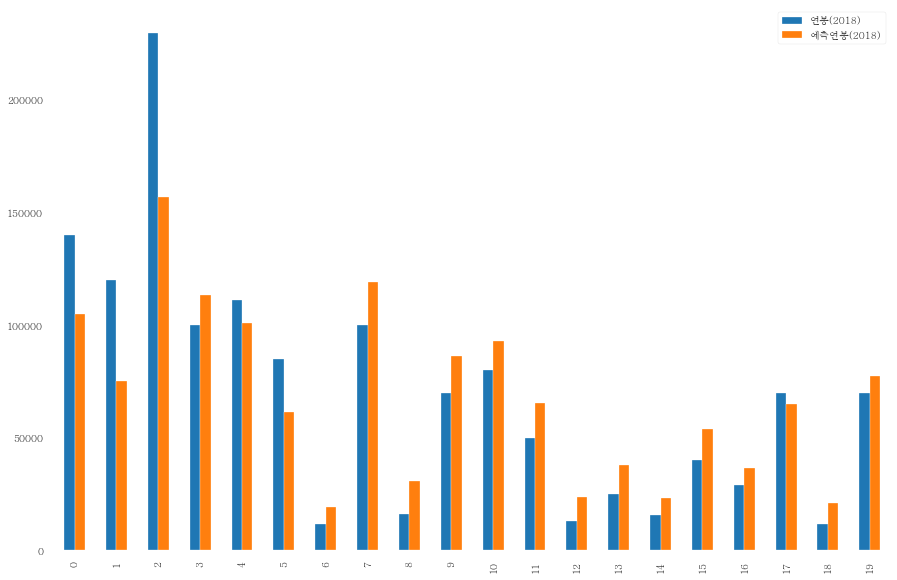

In [260]:
#최초의 csv 데이터 호출 : 실제 2018년 연봉값을 불러오기위함
temp_picher_df=pd.read_csv("G:/picher.csv")

X=df2[['BABIP','RA9-WAR','블론','연봉(2017)']]
predict_2018_salary = lr.predict(X)
df2['예측연봉(2018)'] = pd.Series(predict_2018_salary)
y_compare={'연봉(2018)':temp_picher_df['연봉(2018)'],'예측연봉(2018)':df2['예측연봉(2018)']}
y_compare=pd.DataFrame(y_compare)

y_compare_10 = y_compare.head(20)
mpl.rc('font', family='Batang')
y_compare_10.plot(y=['연봉(2018)', '예측연봉(2018)'], kind="bar")

In [261]:
lr.predict(X)

array([ 1.04977650e+05,  7.53911825e+04,  1.56871978e+05,  1.13224450e+05,
        1.00984092e+05,  6.14773281e+04,  1.90999734e+04,  1.19118197e+05,
        3.06717883e+04,  8.62837908e+04,  9.29061018e+04,  6.52700943e+04,
        2.37363412e+04,  3.77613249e+04,  2.31992951e+04,  5.40749777e+04,
        3.63888305e+04,  6.51212111e+04,  2.10069032e+04,  7.75668244e+04,
        1.13572065e+05,  1.98245691e+04,  2.15103295e+04,  5.76896907e+04,
        2.96226384e+04,  1.57699781e+04,  3.06796256e+04,  2.28919949e+04,
        2.15673523e+04,  1.83787126e+04,  1.10858921e+04,  1.34488023e+04,
        1.34560832e+04,  2.58579520e+04,  1.03373735e+04,  8.66520282e+03,
        4.84705487e+04,  2.61850600e+04,  8.62648250e+03,  3.20312588e+04,
        1.90358608e+04,  1.15329383e+04,  1.61909752e+04,  2.43977488e+04,
        5.56629231e+04,  1.88319262e+04,  5.69700101e+03,  5.20933558e+03,
        4.17356100e+04,  6.49390020e+04,  4.95087864e+03,  4.11350186e+04,
        1.60661869e+04,  